# PyParseis-Model.ipynb

Calculates synthetic parallel seismic first arrival data

Based on Niederleithinger 2010 (PhD thesis)

<img src="ParSeis-principle.jpg">
<i>Principle of Parallel Seismsic Measurements</i>

Niederleithinger BAM 8.2 2025

Last change(s):
<ul>
<li>Niederleithinger 11.08.2025 Changing import filename</li>
<li>Niederleithinger 15.08.2025 Converted to Jupyter notebook</li>
</ul>

Note: Start Jupyter notebook from the directory which contains the PyParSeis files (otherwise PyParSeis.py ind imagees for the markdown cell will not be found)

Next cell does the the import stuff


In [1]:
# -*- coding: utf-8 -*-
#!/usr/bin/python

from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as pltext

from PyParSeis import PSfe

# Setting model parameters

R  : pile radius in m
D  : distance pile edge - sensor in m

z0 : shallowest sensor position in m (positive downwards, z=0 pile top)
dz : sensor interval in m 
z1 : deepest sensor position in m

cp : p-wave velocity in pile in m/s (actually a stress wave, close to a bar wave)
cs : p-wave velocity in soil in m/s
L  : pile length in m
off: time offset in s (constant added to all travel times, e.g. to mimick trigger or picking errors)
inc: inclination (borehole vs. pile, 2D) in deg NOT SUPPORTED IN CURRENT VERSION of PyParSeis

In [2]:
#set parameters
R = 0.3 # pile radius in m
D = 0.5 # distance pile edge - sensor in m

z0 = 1.0 # shallowest sensor position in m (positive downwards)
dz = 0.5  # sensor interval in m 
z1 = 15 # deepest sensor position in m

cp = 4200.0 # p-wave concrete velocity in m/s 
cs = 1500.0 # p-wave soil velocity  in m/s
L = 11.0 # pile length in m
off = 0.0005 # time offset in s
inc = 0.0 # inclination in deg

#calculate array with sensor depths
z=np.arange(z0,z1*1.001,dz) # z1*1.001 to include z1 in array

# Calculate traveltimes, add noise

The traveltime calculation is based on the follow sketch:

<img src="ParSeis-raypath1.jpg">
<i>Raypath for a pile and parallel borehole</i>

Noise (e.g. fist arrival picking errors) is generated by random numbers between +/- a chosen amplitude (parameter noiseamp)

In [3]:
# calculate traveltimes
tcalc = PSfe(R,D,z,cp,cs,L,off)

#add noise 
noiseamp = 0.0  # max. noise amplitude in ms
noiseamp = noiseamp/1000
iz = z.size
noise=np.random.random_sample((iz,))
noise= (noise-0.5)*noiseamp
tcalc =tcalc+noise

# Plot calculated travel times

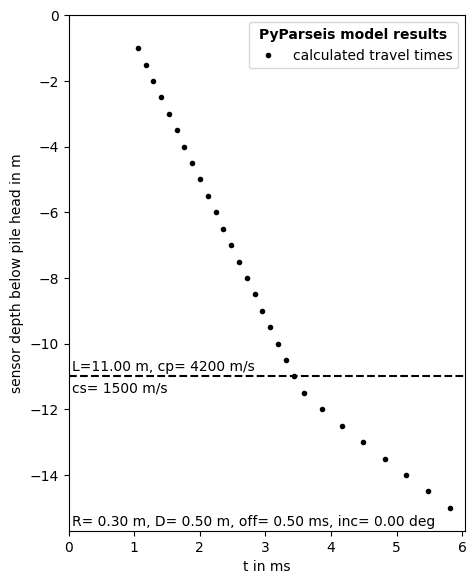

In [4]:
# To do: plot model geometry


cm2inch=1/2.54
fig = plt.figure(figsize=(13*cm2inch,17*cm2inch))

plt.plot(tcalc*1000, -z, 'ok', label='calculated travel times', markersize=3)
xmin, xmax, ymin, ymax = plt.axis()
plt.axis([0, xmax,ymin,0])

plt.xlabel("t in ms")
plt.ylabel("sensor depth below pile head in m")
plt.legend(title='PyParseis model results',title_fontproperties={'weight':'bold'})
plt.plot([0,xmax],[-L,-L],ls='--', marker='', color ='k')
plt.text(xmax/100, -L-ymin*0.01, 'L=%5.2f m, cp=%5.0f m/s' % (L, cp))
plt.text(xmax/100, -L+ymin*0.03, 'cs=%5.0f m/s' % (cs))
plt.text(xmax/100, ymin*0.99, 'R=%5.2f m, D=%5.2f m, off=%5.2f ms, inc=%5.2f deg' % (R,D,off*1000,inc))
plt.savefig('parseis-fit.png', dpi = 300)
plt.show()
plt.close()

# Save traveltime to text file 

In [5]:
# Build a unique filename from model parameters
filename = 'PyParseisModel-R%4.2f-D%4.2f-L%5.2f-cp%4.0f-cs%4.0f-off%4.2f-inc%5.2f-noiseamp%5.2f.dat' % (R,D,L,cp,cs,off*1000,inc,noiseamp*1000)# remove 
# remove speces in filename
filename = "".join(filename.split())

f = open(filename,'w')
for i in range (0,iz):
    f.write(str(z[i])+' '+str(tcalc[i]*1000)+'\n')
f.close()